#Projet 6 problem 2 R

In [12]:
#install required packages
install.packages("rpart")
install.packages("rpart.plot")
install.packages("C50")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [13]:
# Load the required libraries
library(rpart)
library(rpart.plot)
library(C50)

In [19]:
# Load the datasets
loans_train <- read.csv("/content/Loans_Training.csv")
loans_test <- read.csv("/content/Loans_Test.csv")
loans_train$Approval <- as.factor(loans_train$Approval)

In [20]:
# Select predictors and target
predictors <- c("Debt.to.Income.Ratio", "FICO.Score", "Request.Amount", "Interest")
target <- "Approval"

In [21]:
# Create a CART model
cart_model <- rpart(Approval ~ ., data = loans_train[, c(predictors, target)], method = "class")


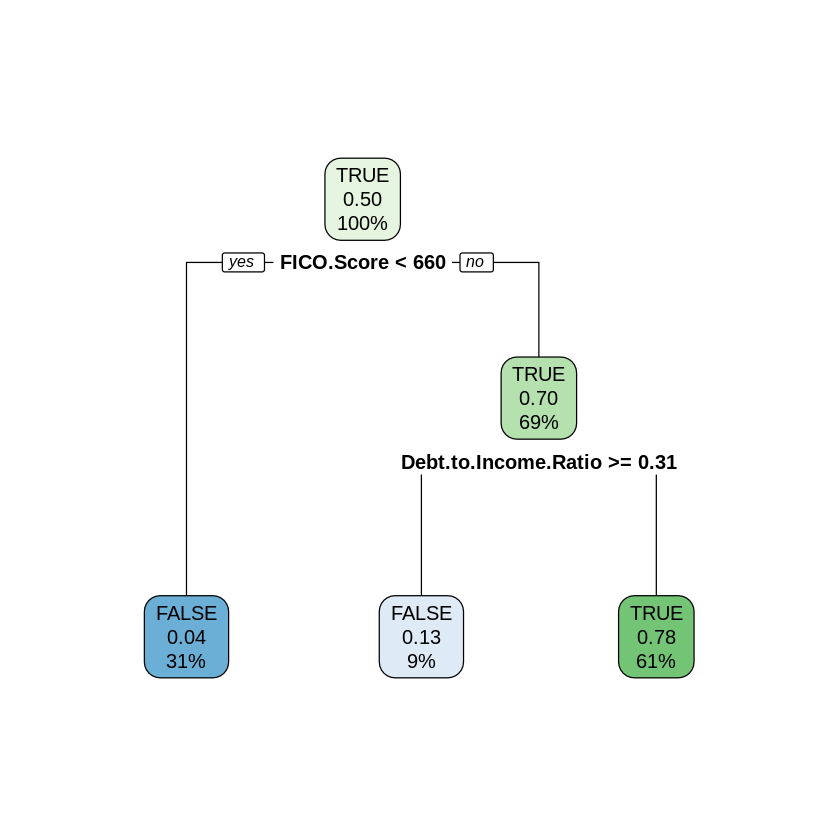

In [22]:
rpart.plot(cart_model)

In [24]:
print(cart_model$frame[1:5, ])

                   var      n     wt   dev yval complexity ncompete nsurrogate
1           FICO.Score 150302 150302 75066    2  0.5646498        3          3
2               <leaf>  46002  46002  1808    1  0.0000000        0          0
3 Debt.to.Income.Ratio 104300 104300 30872    2  0.1267551        3          0
6               <leaf>  12873  12873  1679    1  0.0000000        0          0
7               <leaf>  91427  91427 19678    2  0.0000000        0          0
      yval2.V1     yval2.V2     yval2.V3     yval2.V4     yval2.V5
1 2.000000e+00 7.506600e+04 7.523600e+04 4.994345e-01 5.005655e-01
2 1.000000e+00 4.419400e+04 1.808000e+03 9.606974e-01 3.930264e-02
3 2.000000e+00 3.087200e+04 7.342800e+04 2.959923e-01 7.040077e-01
6 1.000000e+00 1.119400e+04 1.679000e+03 8.695720e-01 1.304280e-01
7 2.000000e+00 1.967800e+04 7.174900e+04 2.152318e-01 7.847682e-01
  yval2.nodeprob
1   1.000000e+00
2   3.060638e-01
3   6.939362e-01
6   8.564756e-02
7   6.082886e-01


FICO.Score (Node 1):

var: The variable that the node splits on is FICO.Score.
n: The total number of observations in this node is 150,302.
wt: The weighted Gini index for this node is 150,302.
dev: The deviance for this node is 75,066.
yval: The predicted class for this node is 2.
complexity: The complexity parameter is 0.5646498.
ncompete: Number of competitors is 3.

Debt.to.Income.Ratio (Node 3):

This node splits based on the Debt.to.Income.Ratio.
n: Number of observations in this node is 104,300.
wt: The weighted Gini index for this node is 104,300.
dev: The deviance for this node is 30,872.
yval: The predicted class for this node is 2.
complexity: The complexity parameter is 0.1267551.
ncompete: Number of competitors is 3.

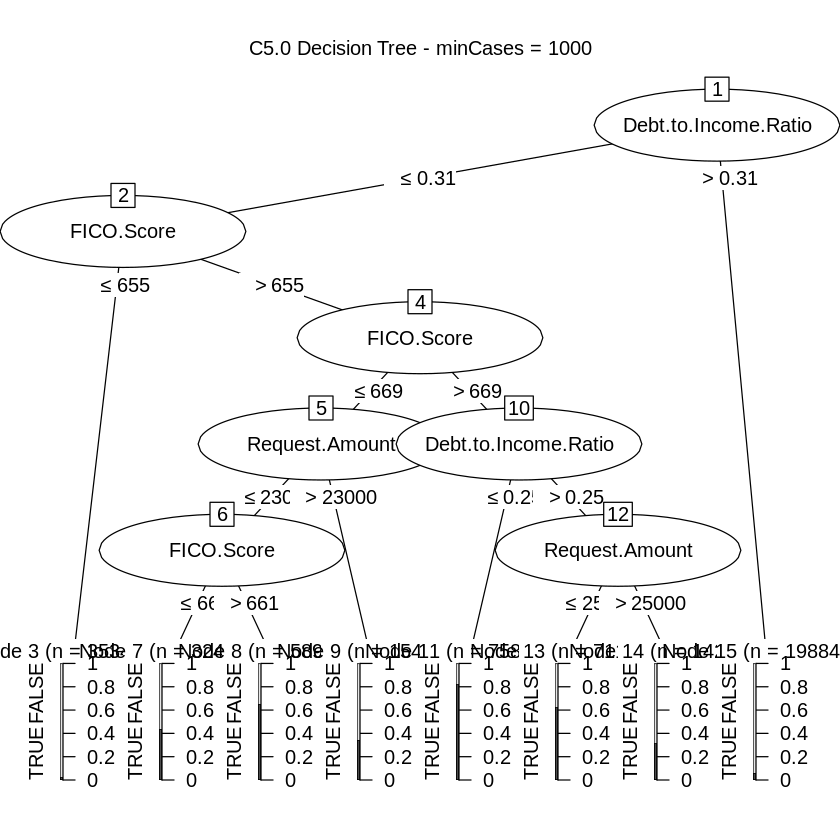

In [23]:
# Create a C5.0 model
c5_model <- C5.0(loans_train[, predictors], loans_train[, target], control = C5.0Control(minCases = 1000))

# Visualize the decision tree for C5.0
plot(c5_model, main = "C5.0 Decision Tree - minCases = 1000")

In [25]:
summary(c5_model)


Call:
C5.0.default(x = loans_train[, predictors], y = loans_train[, target],
 control = C5.0Control(minCases = 1000))


C5.0 [Release 2.07 GPL Edition]  	Sun Dec 10 23:15:10 2023
-------------------------------

Class specified by attribute `outcome'

Read 150302 cases (5 attributes) from undefined.data

Decision tree:

Debt.to.Income.Ratio > 0.31: FALSE (19884/1160)
Debt.to.Income.Ratio <= 0.31:
:...FICO.Score <= 655: FALSE (35346/894)
    FICO.Score > 655:
    :...FICO.Score <= 669:
        :...Request.Amount > 23000: FALSE (1547/529)
        :   Request.Amount <= 23000:
        :   :...FICO.Score <= 661: FALSE (3246/1418)
        :       FICO.Score > 661: TRUE (5892/2056)
        FICO.Score > 669:
        :...Debt.to.Income.Ratio <= 0.25: TRUE (75846/13356)
            Debt.to.Income.Ratio > 0.25:
            :...Request.Amount <= 25000: TRUE (7112/2658)
                Request.Amount > 25000: FALSE (1429/455)


Evaluation on training data (150302 cases):

	    Decision Tree   
	  

>First Split:

Condition: Debt.to.Income.Ratio > 0.31
Decision: If the Debt-to-Income Ratio is greater than 0.31, predict FALSE.
Node Details: 19884 cases fall into this category, and 1160 cases are misclassified.
>>Second Split:

Condition: Debt.to.Income.Ratio <= 0.31
Decision: If the Debt-to-Income Ratio is less than or equal to 0.31, further examine FICO.Score.
Node Details: 130418 cases fall into this category.
>>>Third Split:

Condition: FICO.Score <= 655
Decision: If FICO.Score is less than or equal to 655, predict FALSE.
Node Details: 35346 cases fall into this category, and 894 cases are misclassified.

Comparing models:


>Similarities:

>Target Variable: Both models are predicting the same target variable, which is the "Approval" status.                            
Predictors: The models use the same set of predictors, including "Debt-to-Income Ratio," "FICO Score," and "Request Amount."
>>Differences:

>>Algorithm: The primary difference is in the algorithm used. CART uses a decision tree algorithm, while C5.0 uses a different algorithm for decision tree construction.

>>Minimum Cases per Terminal Node:

>>CART: There is no mention of a specific minimum number of cases per terminal node in the provided CART model.
C5.0: The C5.0 model has a minimum of 1000 cases per terminal node specified in its construction.
Decision Tree Structure:

>>CART Decision Tree: The decision tree structure in CART is based on recursive binary splits. The first few splits involve conditions on "FICO.Score" and "Debt.to.Income.Ratio."
C5.0 Decision Tree: The decision tree structure in C5.0 involves conditions on "Debt.to.Income.Ratio," "FICO.Score," and "Request.Amount."